## Zomato Dataset Exploratory Data Analysis


Zomato Dataset, Zomato adlı bir restoran inceleme ve rezervasyon platformundan toplanmış verileri içerir. Bu veriler, çeşitli restoranların adı, adresi, mutfak türü, ortalama değerlendirme, fiyat aralığı gibi bilgileri içerir. Ayrıca, restoranların çeşitli özelliklerini belirten sütunlar da bulunabilir, örneğin, çevrimiçi teslimat hizmeti sunup sunmadığı veya rezervasyon yapılabilen bir yer olup olmadığı gibi.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as img
%matplotlib inline

# Tüm satır ve sütunları görünmesi için ayarlama
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

In [2]:
import pandas as pd

# 'zomato.csv' dosyasını ISO-8859-1 kodlamasıyla oku
df = pd.read_csv('zomato.csv', encoding='ISO-8859-1')

# Veri setinin ilk beş satırını göster
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
# DataFrame'in kısa bir özeti
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Missing Values

In [4]:
# Satır ve sütun sayısına bakma
df.shape

(9551, 21)

In [5]:
# Eksik değerlere bakma
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
# 'Cuisines' sütunundaki eksik değerleri en sık kullanılan değerle doldurma
most_common_cuisine = df['Cuisines'].mode()[0]
df['Cuisines'].fillna(most_common_cuisine, inplace=True)

In [7]:
# Eksik değer kontrolü
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

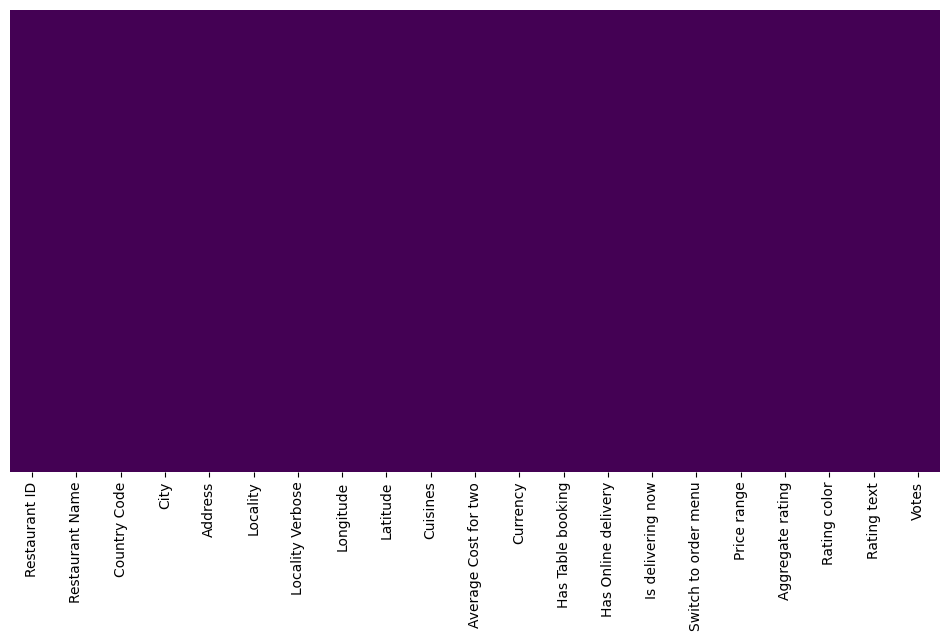

In [8]:
# Eksik değerlerin varlığını görselleştirmek için bir ısı haritası oluşturma
plt.figure(figsize =(12, 6))
# matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [9]:
import pandas as pd

# 'Country-Code.xlsx' dosyasını oku
country = pd.read_excel('Country-Code.xlsx')

# Veri setinin ilk beş satırını göster
country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [10]:
# Data tiplerini kontrol etme
country.dtypes

Country Code     int64
Country         object
dtype: object

In [11]:
# 'Country Code' sütununa göre 'df' ve 'country' DataFramelerini birleştirme
final_df=pd.merge(df, country, on='Country Code', how='left')

In [12]:
# Verideki ülke isimlerini görelim.
country_names=final_df.Country
country_names

0          Phillipines
1          Phillipines
2          Phillipines
3          Phillipines
4          Phillipines
5          Phillipines
6          Phillipines
7          Phillipines
8          Phillipines
9          Phillipines
10         Phillipines
11         Phillipines
12         Phillipines
13         Phillipines
14         Phillipines
15         Phillipines
16         Phillipines
17         Phillipines
18         Phillipines
19         Phillipines
20         Phillipines
21         Phillipines
22              Brazil
23              Brazil
24              Brazil
25              Brazil
26              Brazil
27              Brazil
28              Brazil
29              Brazil
30              Brazil
31              Brazil
32              Brazil
33              Brazil
34              Brazil
35              Brazil
36              Brazil
37              Brazil
38              Brazil
39              Brazil
40              Brazil
41              Brazil
42              Brazil
43         

In [13]:
# Verideki ülke isimlerinin kaç kere geçtiğine bakalım.
country_val=final_df.Country.value_counts
country_val

<bound method IndexOpsMixin.value_counts of 0          Phillipines
1          Phillipines
2          Phillipines
3          Phillipines
4          Phillipines
5          Phillipines
6          Phillipines
7          Phillipines
8          Phillipines
9          Phillipines
10         Phillipines
11         Phillipines
12         Phillipines
13         Phillipines
14         Phillipines
15         Phillipines
16         Phillipines
17         Phillipines
18         Phillipines
19         Phillipines
20         Phillipines
21         Phillipines
22              Brazil
23              Brazil
24              Brazil
25              Brazil
26              Brazil
27              Brazil
28              Brazil
29              Brazil
30              Brazil
31              Brazil
32              Brazil
33              Brazil
34              Brazil
35              Brazil
36              Brazil
37              Brazil
38              Brazil
39              Brazil
40              Brazil
41           

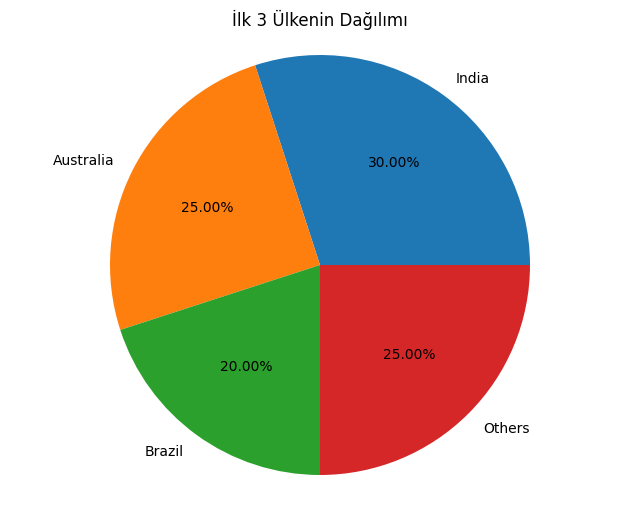

In [14]:
## Pie Chart ile top 3 ülkeyi görselleştirelim.
import matplotlib.pyplot as plt

# İlk 3 ülkenin verileri
labels_top3 = ['India', 'Australia', 'Brazil', 'Others']
sizes_top3 = [30, 25, 20, 25]  # Örnek veri, gerçek verilere uygun olarak değiştirilmeli

# İlk 3 ülkeyi gösteren pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes_top3, labels=labels_top3, autopct='%1.2f%%')
plt.title('İlk 3 Ülkenin Dağılımı')
plt.axis('equal')  # Daireyi dairesel olarak göstermek için
plt.show()

### Gözlem:

In [15]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

Ratings diye ayrı bir veri alt kümesi oluşturup bu alanı inceleyelim.

In [16]:
# 'df' DataFrame'ini 'Aggregate rating', 'Rating color' ve 'Rating text' sütunlarına göre gruplama

ratings=df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

### Gözlem

In [17]:
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

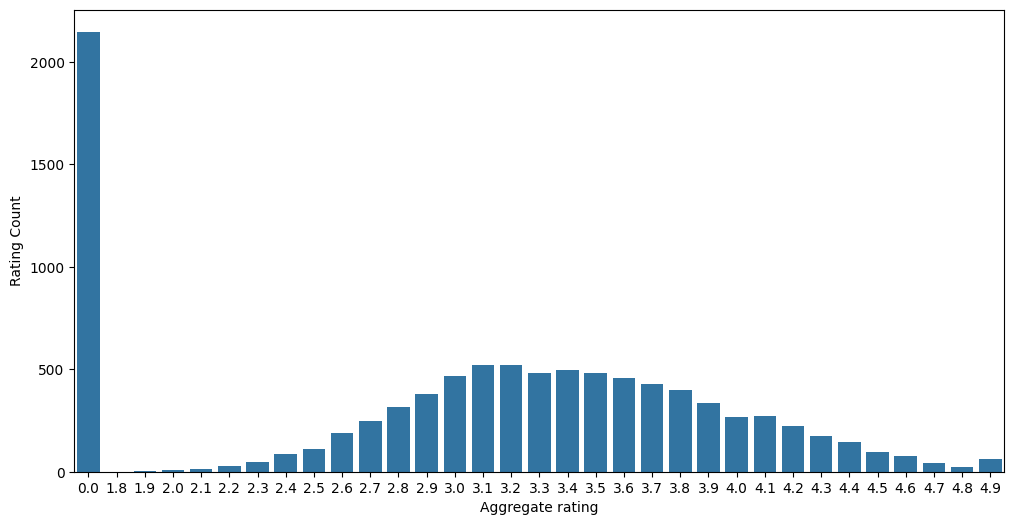

In [18]:
# Çubuk grafiği oluşturma

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="Aggregate rating",y="Rating Count",data=ratings)

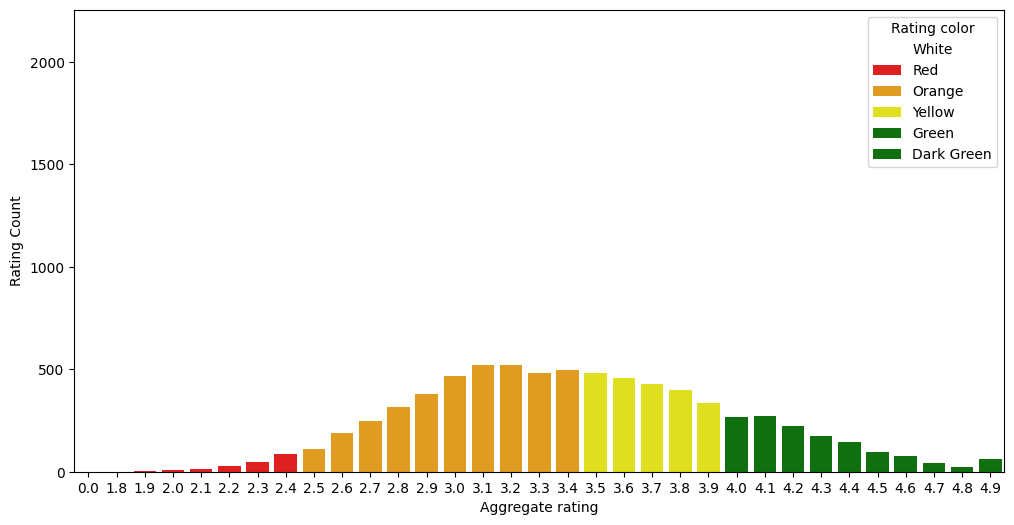

In [19]:
# 'Aggregate rating' sütunu ile 'Rating Count' sütununu karşılaştıran bir çubuk grafiği oluşturma

sns.barplot(x="Aggregate rating",y="Rating Count",hue='Rating color',data=ratings,palette=['white','red','orange','yellow','green','green']);

Gözlem:
1. Not Rated çok yüksek
2. En çok Rating 2.5 to 3.4 arasında

C:\Users\mahsu\AppData\Local\Temp\ipykernel_7632\4105135183.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rating color", data=ratings, palette=['blue','red','orange','yellow','green','green'])


<Axes: xlabel='Rating color', ylabel='count'>

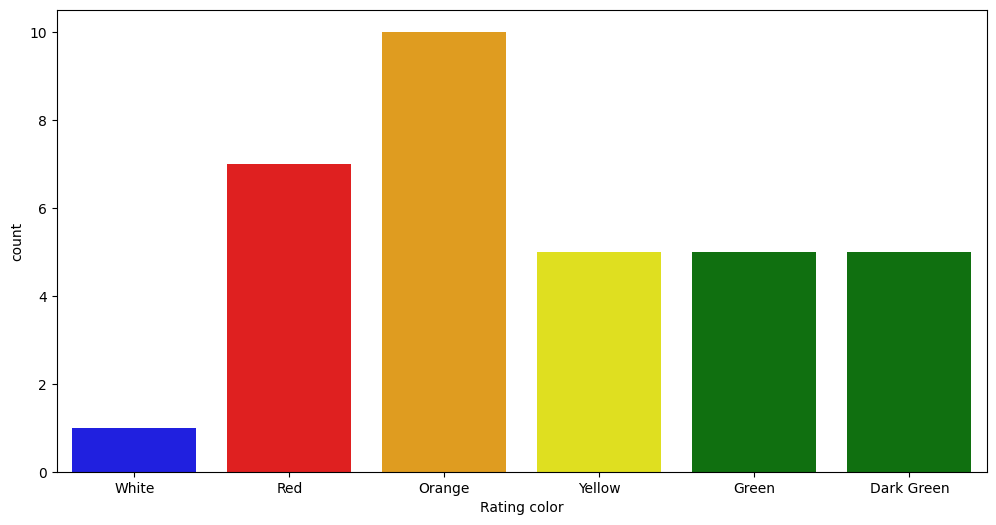

In [20]:
# 'Rating color' sütunundaki değerlerin sayısını görselleştirmek için bir sayım çubuğu grafiği oluşturma
sns.countplot(x="Rating color", data=ratings, palette=['blue','red','orange','yellow','green','green'])

In [21]:
# 'Rating' sütunu 0 olan tüm satırları seçer
zero_rating_records = final_df[final_df['Aggregate rating'] == 0]

In [22]:
final_df.groupby(['Aggregate rating','Country']).size().reset_index().head(5)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


### Gözlem 
En çok 0 Rating'i Hindistan müşterileri vermiş.

In [23]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [24]:
# Hangi ülke hangi parayı kullanıyor?

currency_by_country = final_df[['Country', 'Currency']].drop_duplicates()
print(currency_by_country)

             Country                Currency
0        Phillipines        Botswana Pula(P)
22            Brazil      Brazilian Real(R$)
82     United States               Dollar($)
102        Australia               Dollar($)
185           Canada               Dollar($)
456        Singapore               Dollar($)
564              UAE      Emirati Diram(AED)
624            India      Indian Rupees(Rs.)
9276       Indonesia  Indonesian Rupiah(IDR)
9297     New Zealand           NewZealand($)
9337  United Kingdom              Pounds(£)
9417           Qatar         Qatari Rial(QR)
9437    South Africa                 Rand(R)
9497       Sri Lanka   Sri Lankan Rupee(LKR)
9517          Turkey        Turkish Lira(TL)


In [25]:
# Hangi ülkelerde Online Delivery var
# "Online Delivery" sütunu varsa ve doğru bir şekilde adlandırılmışsa

countries_with_delivery = final_df[final_df['Has Online delivery'] == 'Yes']['Country'].unique()
print("Online Delivery Sunulan Ülkeler:")
print(countries_with_delivery)

Online Delivery Sunulan Ülkeler:
['UAE' 'India']


In [26]:
# 'final_df' içindeki her bir satırın çevrimiçi teslimat hizmetine sahip olup olmadığına bakma
final_df['Has Online delivery']

0        No
1        No
2        No
3        No
4        No
5        No
6        No
7        No
8        No
9        No
10       No
11       No
12       No
13       No
14       No
15       No
16       No
17       No
18       No
19       No
20       No
21       No
22       No
23       No
24       No
25       No
26       No
27       No
28       No
29       No
30       No
31       No
32       No
33       No
34       No
35       No
36       No
37       No
38       No
39       No
40       No
41       No
42       No
43       No
44       No
45       No
46       No
47       No
48       No
49       No
50       No
51       No
52       No
53       No
54       No
55       No
56       No
57       No
58       No
59       No
60       No
61       No
62       No
63       No
64       No
65       No
66       No
67       No
68       No
69       No
70       No
71       No
72       No
73       No
74       No
75       No
76       No
77       No
78       No
79       No
80       No
81       No
82       No
83  

Gözlem: 
1. Online Delivery India ve UAE de var

In [27]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

### City'lerin sipariş sayılarına göre pie chart çizelim.

In [28]:
city_counts = final_df.City.value_counts()
# En üst 5 şehri alma
top_cities = city_counts[:5]
top_cities

City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64

In [29]:
# Şehir isimlerini ve bunlara karşılık gelen sayıları çıkarma
city_labels = top_cities.index
city_values = top_cities.values

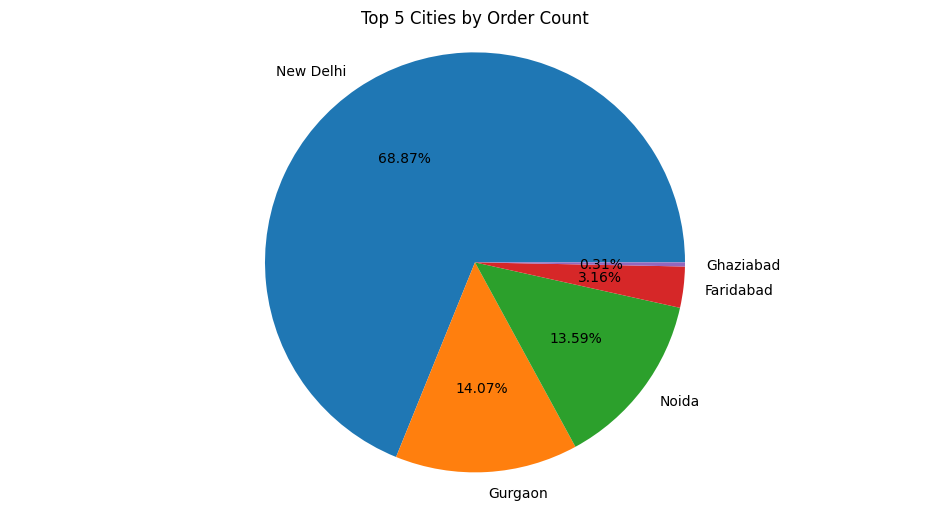

In [30]:
# Pasta grafiğinin çizimi
plt.pie(city_values, labels=city_labels, autopct='%1.2f%%')
plt.title('Top 5 Cities by Order Count')
plt.axis('equal')  # Eşit en boy oranı, pastanın bir daire olarak çizilmesini sağlar.
plt.show()

### Sıre sizde:
Top 10 Cuisine'i bulun

In [31]:
cuisinies_counts = final_df.Cuisines.value_counts()
# En üst 10 şehri alma
top_cuisinies = cuisinies_counts[:10]
top_cuisinies

Cuisines
North Indian                      945
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

In [32]:
Cuisines_values = top_cuisinies.values
Cuisines_labels = top_cuisinies.index

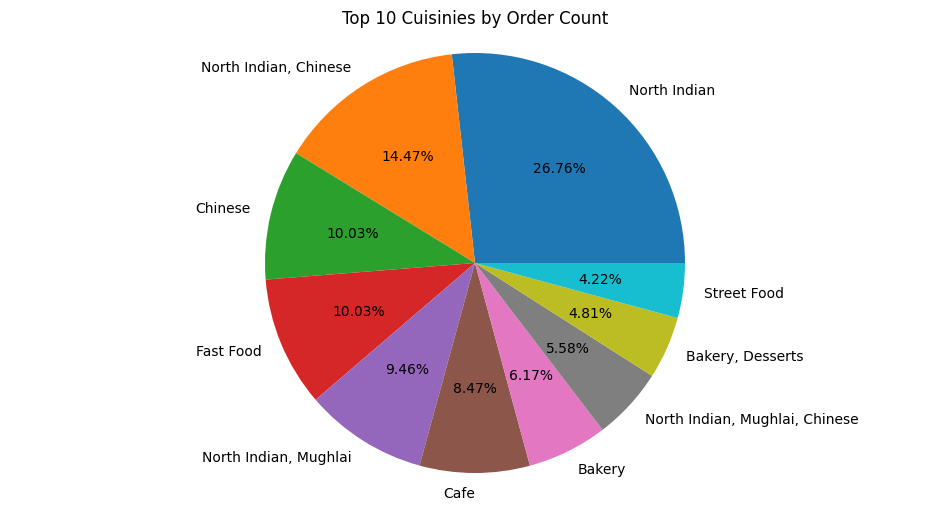

In [33]:
# Pasta grafiğinin çizimi
plt.pie(Cuisines_values, labels=Cuisines_labels, autopct='%1.2f%%')
plt.title('Top 10 Cuisinies by Order Count')
plt.axis('equal')  # Eşit en boy oranı, pastanın bir daire olarak çizilmesini sağlar.
plt.show()